In [1]:
#Import Libaries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\stefa\Documents\07-Instacart Basket Analysis'

In [3]:
#Importing dataframe from 4.10 Coding Etiquette & Excel Reporting Part 1 - Region, Exclusion, Bar 
complete_df = pd.read_pickle(os.path.join(path, '02 data' , 'prepared data' , 'complete_df_1.pkl'))

In [4]:
complete_df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'orders_time_of_day (24 hours)', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'busiest days', 'slowest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'exclusion_flag',
       'avg_spending_user', 'spending_flag', 'ords_freq_median',
       'frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'region', 'age', 'date_joined', 'number_dependents', 'fam_status',
       'income'],
      dtype='object')

Step 5: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [5]:
def customer_profile(row):
    if row ['number_dependents'] > 2 :
        return 'Large Family'
    elif row ['age'] > 60 :
        return 'Retired'
    elif row ['age'] < 30 :
        return 'Young Adult'
    elif row ['income'] > 200000 :
        return 'Wealthy'
    elif (row['income'] > 40000) and (row['income'] < 200000):
        return 'Middle Class'
    elif row ['income'] < 40000 :
        return 'Low Income'
    elif (row['number_dependents'] > 0) and (row['number_dependents'] < 3) :
        return 'Small Family'
    else: return 'Uncatagorized'

In [6]:
complete_df['customer_profile'] = complete_df.apply(customer_profile, axis = 1)

In [7]:
complete_df['customer_profile'].value_counts(dropna=False)

customer_profile
Middle Class    8349480
Large Family    6138887
Retired         5986803
Young Adult     3434482
Low Income       446359
Wealthy           80780
Name: count, dtype: int64

Step 6: Create an appropriate visualization to show the distribution of profiles.

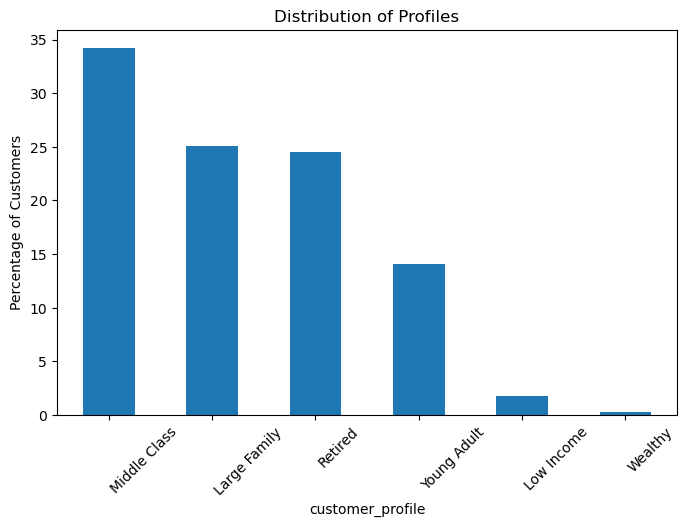

In [8]:
chart = complete_df['customer_profile'].value_counts(normalize=True) * 100

bar = chart.plot(kind='bar', figsize=(8,5))
plt.ylabel('Percentage of Customers')
plt.title('Distribution of Profiles')
plt.xticks(rotation=45, ha='left')

plt.show()

In [9]:
bar_chart=bar.get_figure()

In [10]:
bar_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','customer_profile.png'))

Step 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [11]:
custprofile_stats = complete_df.groupby('customer_profile')['order_number'].agg(['mean', 'min', 'max'])

print("Aggregated statistics (Customer Profiles based on mean, min, max)")
print(custprofile_stats)

Aggregated statistics (Customer Profiles based on mean, min, max)
                       mean  min  max
customer_profile                     
Large Family      21.936572    5   99
Low Income        20.815682    5   99
Middle Class      22.054380    5   99
Retired           21.994275    5   99
Wealthy           23.861847    5   99
Young Adult       21.742379    5   99


Step 8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

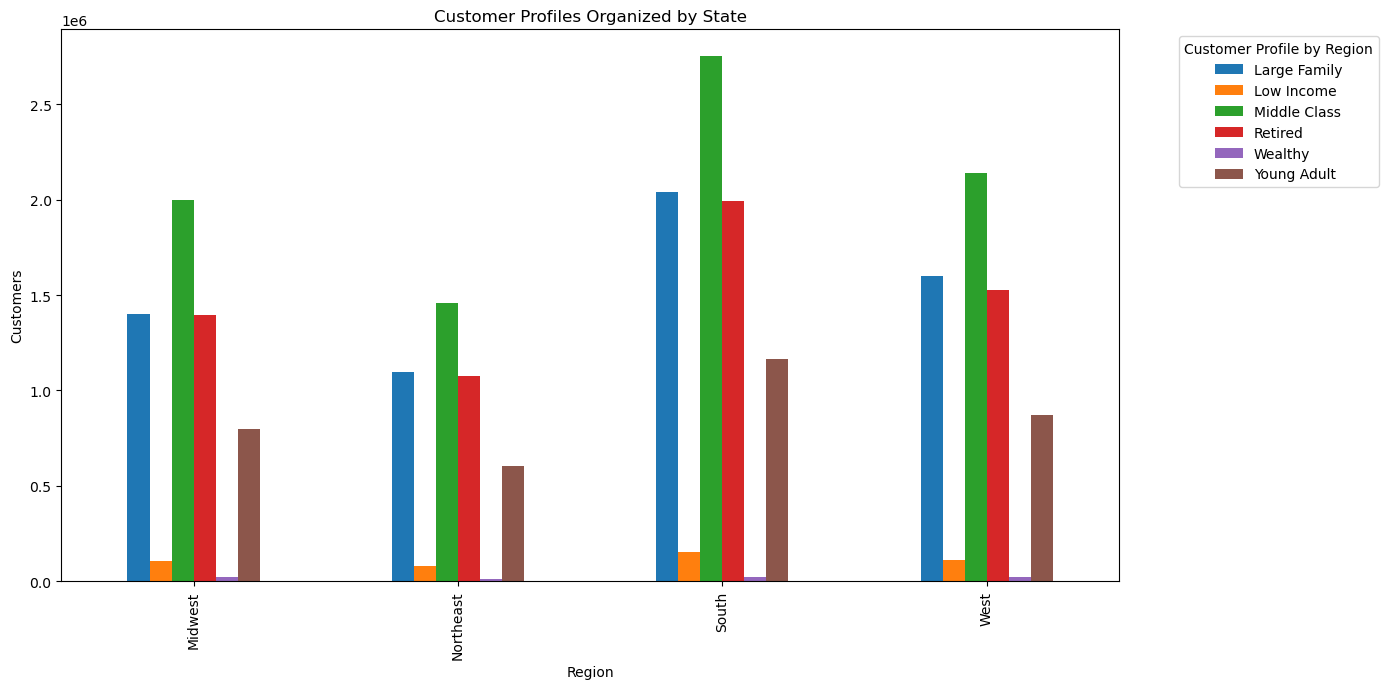

In [12]:
bar_chart_2 = pd.crosstab(complete_df['region'], complete_df['customer_profile'])

bar = bar_chart_2.plot(kind='bar', stacked=False, figsize=(14,7))

plt.title("Customer Profiles Organized by State")
plt.xlabel("Region")
plt.ylabel("Customers")
plt.xticks(rotation=90)  
plt.legend(title='Customer Profile by Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
bar_chart_2=bar.get_figure()

In [14]:
bar_chart_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','customer_region.png'))

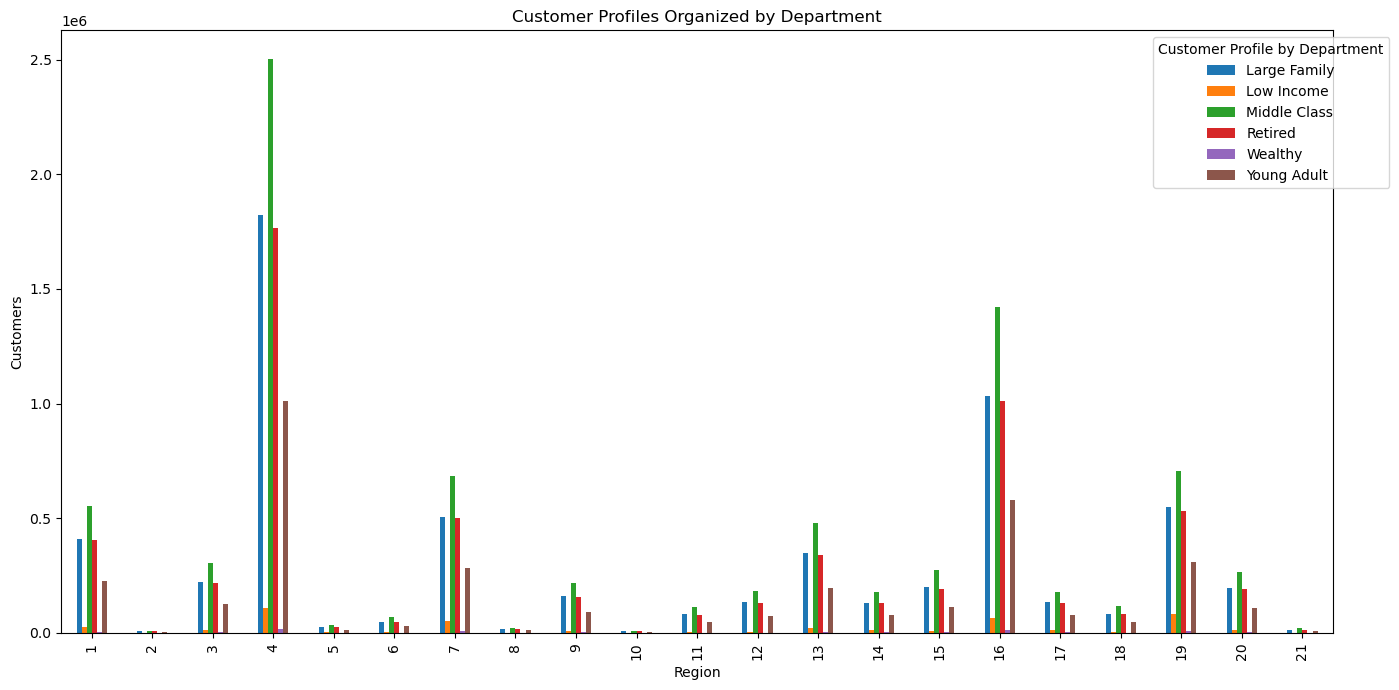

In [15]:
bar_chart_3 = pd.crosstab(complete_df['department_id'], complete_df['customer_profile'])

bar = bar_chart_3.plot(kind="bar", stacked=False, figsize=(14,7))

plt.title('Customer Profiles Organized by Department')
plt.xlabel('Region')
plt.ylabel('Customers')
plt.xticks(rotation=90)  
plt.legend(title='Customer Profile by Department', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.tight_layout()
plt.show()

In [16]:
bar_chart_3=bar.get_figure()

In [17]:
bar_chart_3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','customer_department.png'))